Co-authors Network Analysis
---------------------------

Following the temporal analysis in this notebook the network of co-authors will be studied.

By co authors we mean the people that have both been an author on the same article. One author can have more that one connection, for more that one article. 

Initial we will perform a clean up one the names and then the network of the co-authors will be created. An analysis on meseaures of the network itself will be carried out.

In this notebook:
- 3. Co-authors Network Analysis

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import itertools

%matplotlib inline

In [2]:
df = pd.read_json('../data/data_nov_2017.json')

Clean up
--------

Here we must manually clean up the names. The issue with names is that there is more than one correct way a name can be writen.

*ex. Nikoleta Evdokia Glynatsi, Nikoleta E Glynatsi, N E Glynatsi, N Glynatsi.*

This issue could have not been avoided during the data collection because journals and the authors themsleves have different ways of writing one's name.

Initial all letter in the string author are lowercased.

In [3]:
df.author = df.author.str.lower()

Not many efficient ways for addressing the problem have been found. After a search on various ways of string comparison the Levenshtein distance has been chosen as a measure. The Levenshtein distance is a string metric for measuring the difference between two sequences. *wikipedia link: (https://en.wikipedia.org/wiki/Levenshtein_distance)*

To compute the difference in python the open source library fuzzywuzzy will be used (https://github.com/seatgeek/fuzzywuzzy).


*Example:*

```
>>> fuzz.token_set_ratio('n glynatsi','nikoleta glynatsi')
89
```

There will be errors with the current method. Some author names could have a high token set ratio ans still be the same. For example if only a letter is different between author names. We will keep this error in consideration.

In [5]:
from fuzzywuzzy import fuzz

In [7]:
#for i in df.author.unique():
#    for j in df.author.unique():
#        ratio = fuzz.token_set_ratio(i,j)
#        if ratio >=85 and ratio != 100:
#            df.author = df.author.replace(j, i)

In [4]:
authors_df = df.groupby(['unique_key', 'author']).size().reset_index().groupby('author').size()

In [5]:
authors = [nm for nm in authors_df.index]

In [6]:
co_authors = []
for art in df.unique_key.unique():
    temp = df[df.unique_key == art]
    for auth in temp.author.unique():
        for other_auth in temp.author.unique():
            co_authors.append((auth, other_auth))

For creating and analysing the network the python library networkx will be used though out 
the notebook (https://networkx.github.io/).

In [7]:
G = nx.Graph()
G.add_nodes_from(authors)
G.add_edges_from(co_authors)

Illustrating co-authors network
------------------------

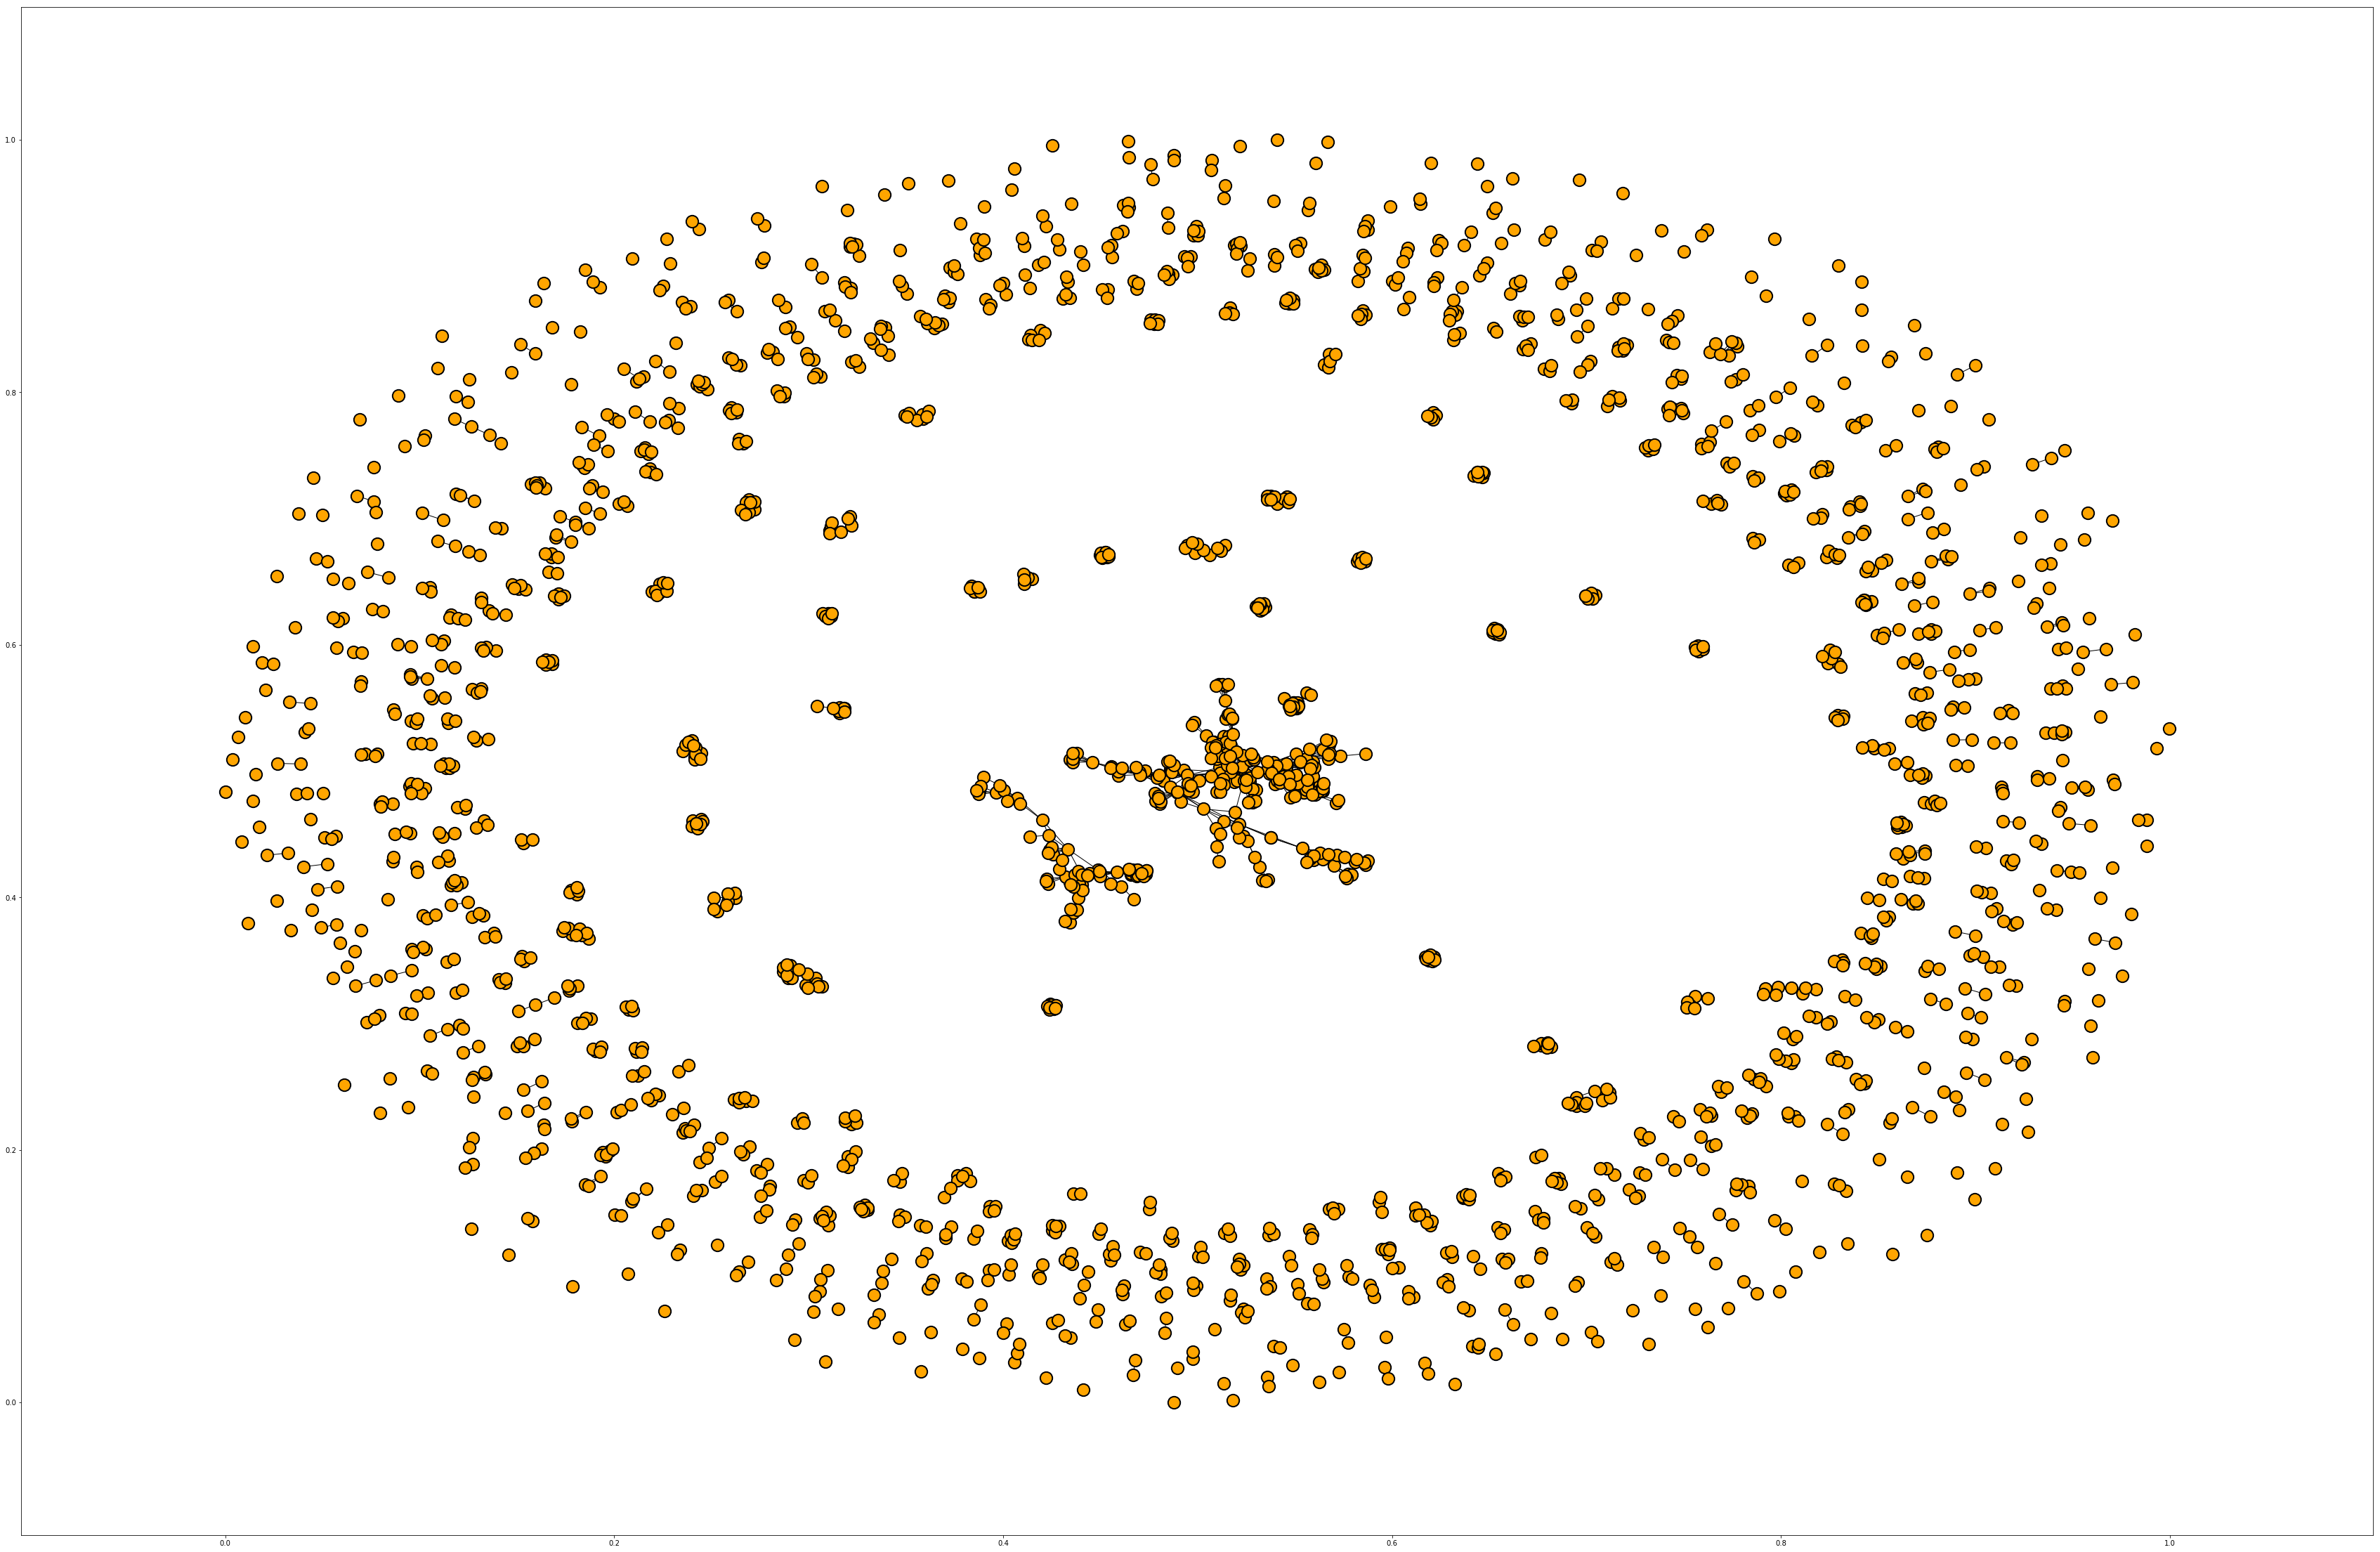

In [164]:
fig = plt.figure(figsize=(60, 40))

pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(G, pos)

plt.show()
#plt.savefig("", format='pdf', bbox_inches='tight')

Analysing co-authors network
-----------------------------

**Clusters**

In [32]:
clusters = sorted(nx.clustering(G).items(), key=lambda x:x[1], reverse=True)[0:10]

In [33]:
clusters

[('a. buscarino', 1.0),
 ('a. cardillo', 1.0),
 ('a. colosimo', 1.0),
 ('a. g. m. schmidt', 1.0),
 ('a. l. amadori', 1.0),
 ('a. l. ferreira', 1.0),
 ('a. lipowski', 1.0),
 ('a. padmaja', 1.0),
 ('a. r. c. pinheiro', 1.0),
 ('a. s. elgazzar', 1.0)]

For unweighted graphs, the clustering of a node uu is the fraction of possible triangles through that node that exist. The maximum number is equal to 1. Thus, cliques do not appear to exist within our graph.

**Centrality**

In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph. 
*wikipedia link: https://en.wikipedia.org/wiki/Centrality*

We could illustrate these names on the graph.

In [34]:
central_author = sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True)[0:10]
central_author

[('matjaz perc', 0.014187643020594966),
 ('long wang', 0.011899313501144166),
 ('marc harper', 0.011441647597254006),
 ('owen campbell', 0.010526315789473684),
 ('vincent knight', 0.010526315789473684),
 ('zhen wang', 0.010526315789473684),
 ('alex carney', 0.010068649885583524),
 ('cameron davidson-pilon', 0.010068649885583524),
 ('georgios koutsovoulos', 0.010068649885583524),
 ('geraint palmer', 0.010068649885583524)]

In [35]:
betweeness_unweighted = sorted(nx.betweenness_centrality(G).items(), 
                               key=lambda x:x[1], reverse=True)[0:10]
betweeness_unweighted

[('matjaz perc', 0.006052880594397425),
 ('yamir moreno', 0.0037950655824143904),
 ('luo-luo jiang', 0.0024177440735139322),
 ('martin a. nowak', 0.0023577437781426014),
 ('arne traulsen', 0.0023006443086534636),
 ('krishnendu chatterjee', 0.0017103796279997654),
 ('zhihai rong', 0.0013170717444990104),
 ('han-xin yang', 0.0012593915111077593),
 ('seung ki baek', 0.0012539211542153684),
 ('zhen wang', 0.0012271061363902176)]

In [37]:
page_rank_unweighted = sorted(nx.pagerank_numpy(G, weight=None).items(), 
                              key=lambda x:x[1], reverse=True)[0:10]
page_rank_unweighted

[('matjaz perc', 0.0019079203184554558),
 ('long wang', 0.0016129751175040655),
 ('zhen wang', 0.001602537790170593),
 ('krishnendu chatterjee', 0.001286564848834342),
 ('angel sánchez', 0.0012843051588453858),
 ('attila szolnoki', 0.001216906370536854),
 ('dirk helbing', 0.0011266708443845078),
 ('zhihai rong', 0.0010937648653190724),
 ('daniel ashlock', 0.0010753837455657364),
 ('josé a. cuesta', 0.0010388566458753973)]

**Cliques**

A clique, in the social sciences, is a group of individuals who interact with one another and share similar interests.

- Text book: http://oxfordindex.oup.com/view/10.1093/acprof:oso/9780198506263.003.0006
- wikipedia link: https://en.wikipedia.org/wiki/Clique
- networkx: https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.clique.html


The size of the largest clique in our graph.

In [39]:
size_largest_clique = nx.graph_clique_number(G)
size_largest_clique

21

In [41]:
number_of_cliques = nx.graph_number_of_cliques(G)
number_of_cliques

952

In [45]:
cliques_G = nx.make_max_clique_graph(G)

In [190]:
def max_clique_graph(cliques, min_size=3):
    """ 
    Create the maximal clique graph of a graph with node names
    """
    K = nx.Graph()
    K.name = 'cliques graph'
    for co_authors in list(cliques):
        if len(co_authors) < min_size:
            continue
        K.add_nodes_from(co_authors)
        
        edges = [(a1, a2) for a1 in co_authors for a2 in co_authors if a1 != a2]
        K.add_edges_from(edges)
        
    return K

In [206]:
cliques = nx.find_cliques(G)
Z = max_clique_graph(cliques, 21)

In [207]:
pos = nx.random_layout(Z)

In [208]:
len(Z.nodes())

21

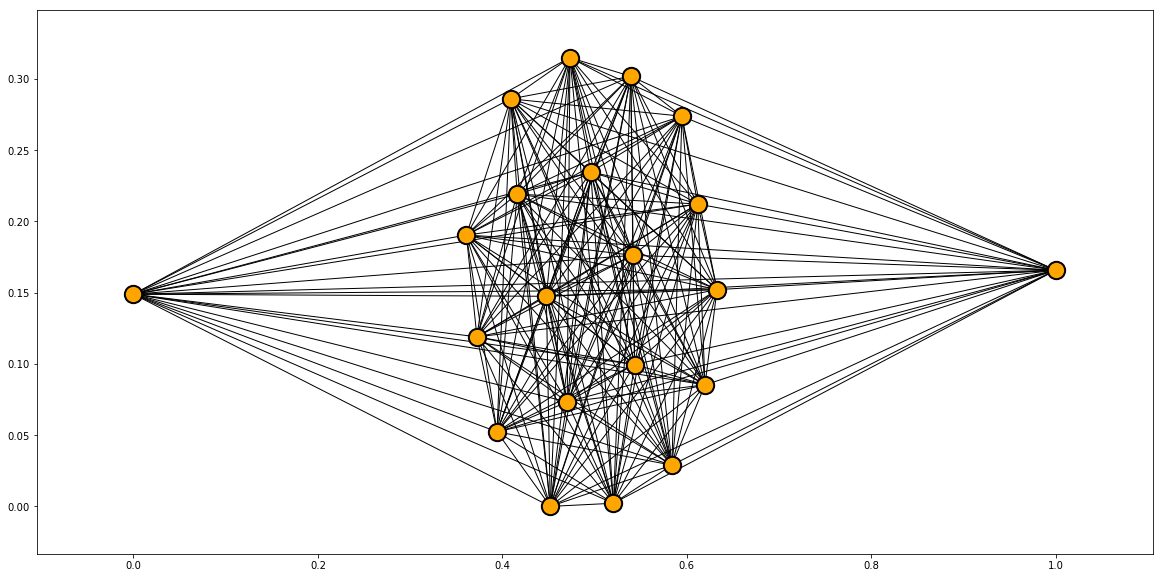

In [212]:
fig = plt.figure(figsize=(20, 10))

pos = nx.spring_layout(Z)
nodes = nx.draw_networkx_nodes(Z, pos, linewidths=2, node_color='orange')
nodes.set_edgecolor('black'); nx.draw_networkx_edges(Z, pos)
#nx.draw_networkx_labels(Z, pos)

plt.show()